In [9]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pymannkendall import original_test

from dataflow import df_train, df_test, df_geography, df_product


In [10]:
# Kết nối tự nhiên giữa các bảng
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

In [12]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901561 entries, 0 to 901560
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ProductID  901561 non-null  int64         
 1   Date       901561 non-null  datetime64[ns]
 2   Zip        901561 non-null  int64         
 3   Units      901561 non-null  int64         
 4   Revenue    901561 non-null  float64       
 5   COGS       901561 non-null  float64       
 6   City       901561 non-null  object        
 7   State      901561 non-null  object        
 8   Region     901561 non-null  object        
 9   District   901561 non-null  object        
 10  Category   901561 non-null  object        
 11  Segment    901561 non-null  object        
 12  Product    901561 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 89.4+ MB


,ProductID,Date,Zip,Units,Revenue,COGS,City,State,Region,District,Category,Segment,Product
0,1228,2013-07-31,78773,12,19648.44,12309.747660,"Austin, TX",TX,Central,District #23,Urban,Convenience,Pirum UC-30
1,781,2014-03-12,90501,16,20351.52,13497.128064,"Torrance, CA",CA,West,District #37,Rural,Productivity,Natura RP-69
2,2090,2013-11-29,44460,26,111367.62,91488.499830,"Salem, OH",OH,East,District #14,Urban,Convenience,Currus UC-25
3,1116,2018-08-29,30122,12,36280.44,21967.806420,"Lithia Springs, GA",GA,East,District #09,Rural,Select,Pirum RS-04
4,993,2013-04-27,75789,14,55557.18,48645.866808,"Troup, TX",TX,Central,District #24,Urban,Convenience,Natura UC-56


In [15]:
print(df.isnull().sum())

ProductID    0
Date         0
Zip          0
Units        0
Revenue      0
COGS         0
City         0
State        0
Region       0
District     0
Category     0
Segment      0
Product      0
dtype: int64


# 2. Phân bố dữ liệu theo Category và Segment

`Segment` (Phân khúc):
- Productivity: Hướng đến khách hàng tìm kiếm sản phẩm tăng năng suất công việc hoặc cuộc sống.
- Convenience: Dành cho khách hàng ưu tiên sự tiện lợi, dễ sử dụng và tiết kiệm thời gian.
- Moderation: Nhắm đến khách hàng có nhu cầu tiêu dùng trung bình, cân bằng giữa giá cả và chất lượng.
- Extreme: Dành cho khách hàng có nhu cầu cao, sẵn sàng chi trả cho các sản phẩm cao cấp.
- Youth: Dành cho khách hàng trẻ tuổi, thích các sản phẩm thời trang, sáng tạo và theo xu hướng.
- Select: Nhắm đến khách hàng chọn lọc, tìm kiếm sản phẩm đặc biệt nhưng không quá xa xỉ.
- All Season: Các sản phẩm sử dụng quanh năm, không phụ thuộc vào mùa vụ.
- Regular: Dành cho khách hàng tìm kiếm sản phẩm ổn định, bền bỉ và lâu dài.

`Category` (Danh mục):
- Urban: Sản phẩm phục vụ nhu cầu tiêu dùng ở các khu vực đô thị với cơ sở hạ tầng phát triển.
- Rural: Sản phẩm phục vụ khách hàng ở khu vực nông thôn với nhu cầu cơ bản và giá cả hợp lý.
- Mix: Sản phẩm phù hợp cho cả thành thị và nông thôn, hoặc sự kết hợp giữa các yếu tố khác nhau.
- Youth: Sản phẩm nhắm đến giới trẻ, yêu thích sự sáng tạo, thời trang và xu hướng mới.

C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_21164\3109792159.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_21164\3109792159.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


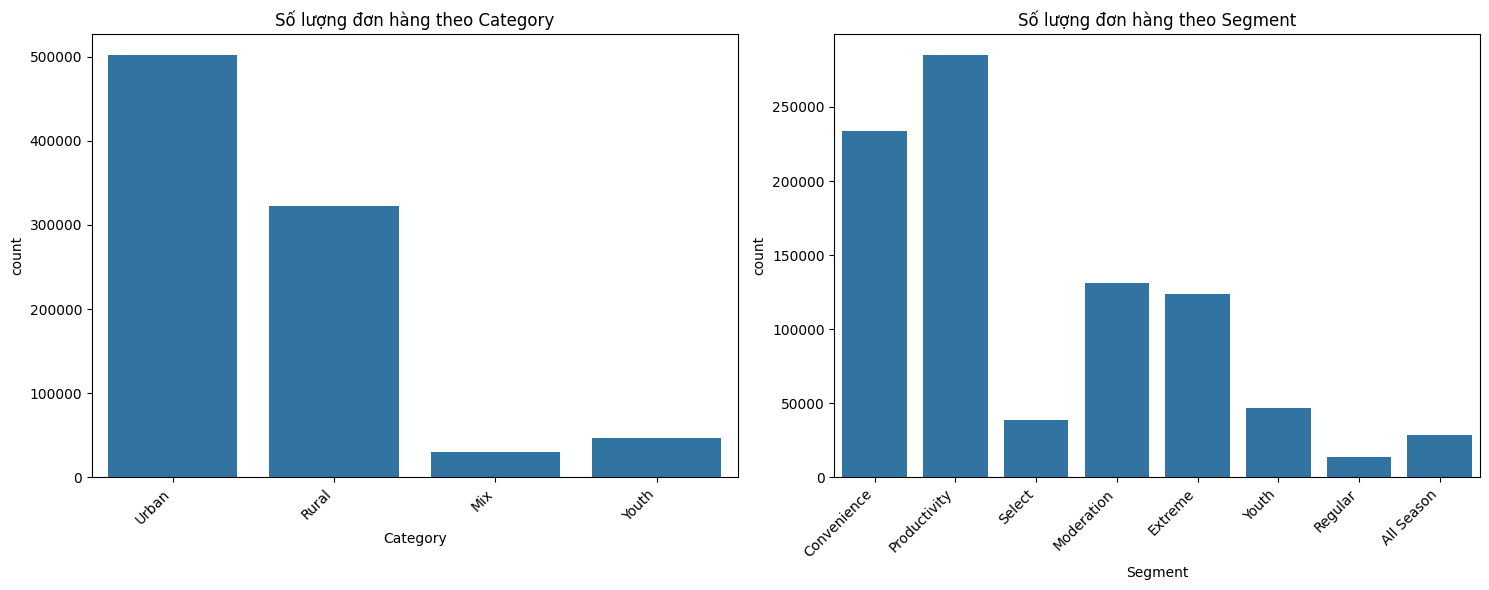

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo 2 biểu đồ con
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ Số lượng đơn hàng theo Category
sns.countplot(x="Category", data=df, ax=axes[0])
axes[0].set_title("Số lượng đơn hàng theo Category")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Biểu đồ Số lượng đơn hàng theo Segment
sns.countplot(x="Segment", data=df, ax=axes[1])
axes[1].set_title("Số lượng đơn hàng theo Segment")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Hiển thị đồ thị
plt.tight_layout()
plt.show()


`Category` 
- Urban có số lượng bán ra cao nhất, cho thấy đây là một thị trường rất quan trọng.  
- Rural dù có số lượng bán ra thấp hơn Urban nhưng vẫn là thị trường lớn và ổn định.  
- Youth và Mix có số lượng bán ra thấp, cần chiến lược phát triển phù hợp để tăng trưởng trong các phân khúc này.

`Segment`
- Productivity và Convenience là hai phân khúc có số lượng sản phẩm bán ra cao nhất, chiếm ưu thế trong thị trường.
- Moderation và Extreme có số lượng bán ra ở mức trung bình, nhưng vẫn có tiềm năng phát triển.
- Youth, Select, All Season, và Regular có số lượng bán ra thấp, bạn cần điều chỉnh chiến lược tiếp thị hoặc thay đổi sản phẩm để cải thiện doanh số trong các phân khúc này.

# 3. Doanh thu (Revenue) theo Category và Segment

C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_21164\1183390812.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_21164\1183390812.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


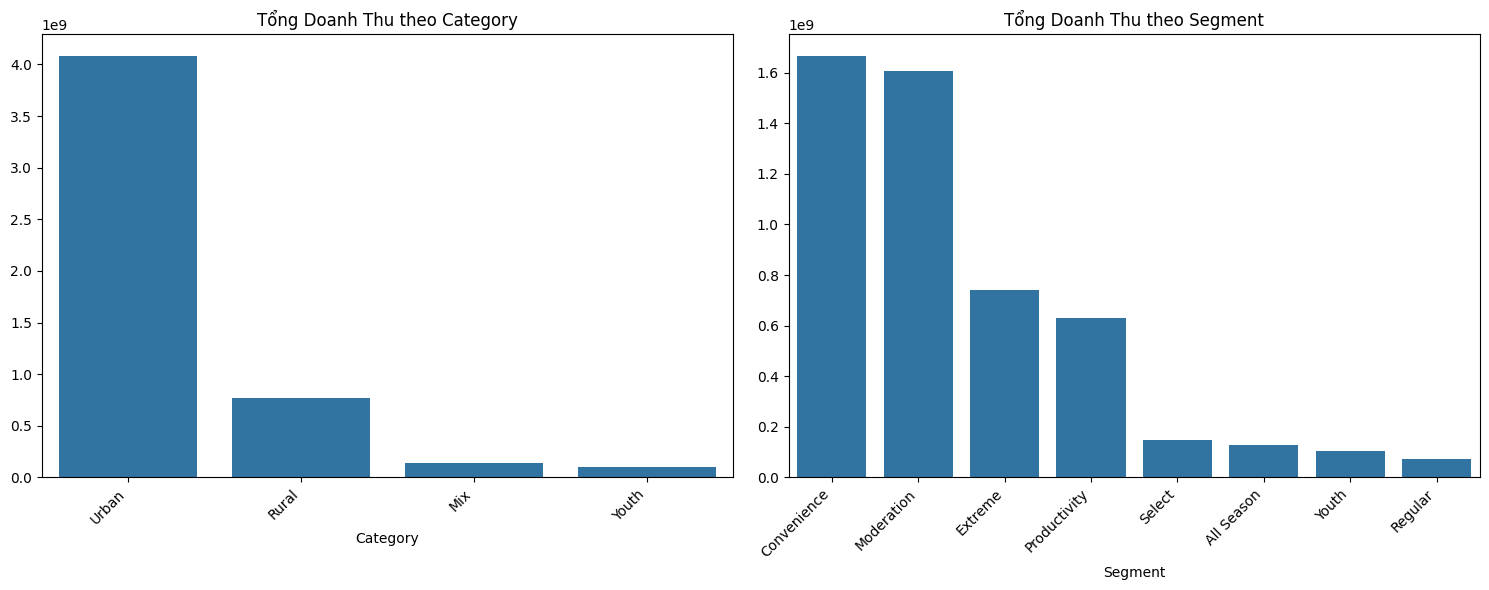

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tổng doanh thu theo Category
category_revenue = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)

# Tổng doanh thu theo Segment
segment_revenue = df.groupby("Segment")["Revenue"].sum().sort_values(ascending=False)

# Tạo 2 biểu đồ con
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ Tổng Doanh Thu theo Category
sns.barplot(x=category_revenue.index, y=category_revenue.values, ax=axes[0])
axes[0].set_title("Tổng Doanh Thu theo Category")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Biểu đồ Tổng Doanh Thu theo Segment
sns.barplot(x=segment_revenue.index, y=segment_revenue.values, ax=axes[1])
axes[1].set_title("Tổng Doanh Thu theo Segment")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Hiển thị đồ thị
plt.tight_layout()
plt.show()



`Category:`
- Urban có doanh thu vượt trội, phản ánh nhu cầu tiêu dùng cao tại các khu vực thành thị, nơi có thị trường lớn và đông đúc. Các sản phẩm trong phân khúc này cần tiếp tục phát triển để đáp ứng các nhu cầu đa dạng và tăng trưởng bền vững.
- Rural có doanh thu thấp hơn nhưng vẫn có tiềm năng đáng kể. Các chiến lược sản phẩm và giá cần điều chỉnh để phục vụ nhu cầu tiêu dùng ở khu vực nông thôn, nơi có đặc thù và sự khác biệt về lối sống và thói quen tiêu dùng.
- Mix và Youth có doanh thu khiêm tốn, cho thấy các phân khúc này cần được nghiên cứu và điều chỉnh chiến lược rõ ràng hơn. Việc phát triển sản phẩm phù hợp và xây dựng chiến lược tiếp thị hiệu quả sẽ giúp tăng trưởng doanh thu trong tương lai.

`Segment:`
- Convenience có doanh thu cao nhất, cho thấy nhu cầu mạnh mẽ đối với các sản phẩm tiện lợi, dễ sử dụng và phù hợp với lối sống bận rộn. Đây là phân khúc chiến lược quan trọng.
- Moderation và Extreme có doanh thu ổn định, phục vụ nhu cầu tiêu dùng trung bình và cao hơn. Các sản phẩm trong các phân khúc này có thể tập trung vào chất lượng và tính năng đặc biệt, thu hút khách hàng tìm kiếm sự khác biệt.
- Youth và Regular có doanh thu thấp nhất, có thể do chưa khai thác được hết tiềm năng của nhóm khách hàng này. Cần cải thiện chiến lược tiếp thị và sáng tạo sản phẩm để thu hút sự chú ý từ đối tượng trẻ tuổi và những khách hàng tìm kiếm sự ổn định.  



# 4. Biên lợi nhuận (Profit Margin) theo Category và Segment

C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_21164\1849660706.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\Hưng Tăng\AppData\Local\Temp\ipykernel_21164\1849660706.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


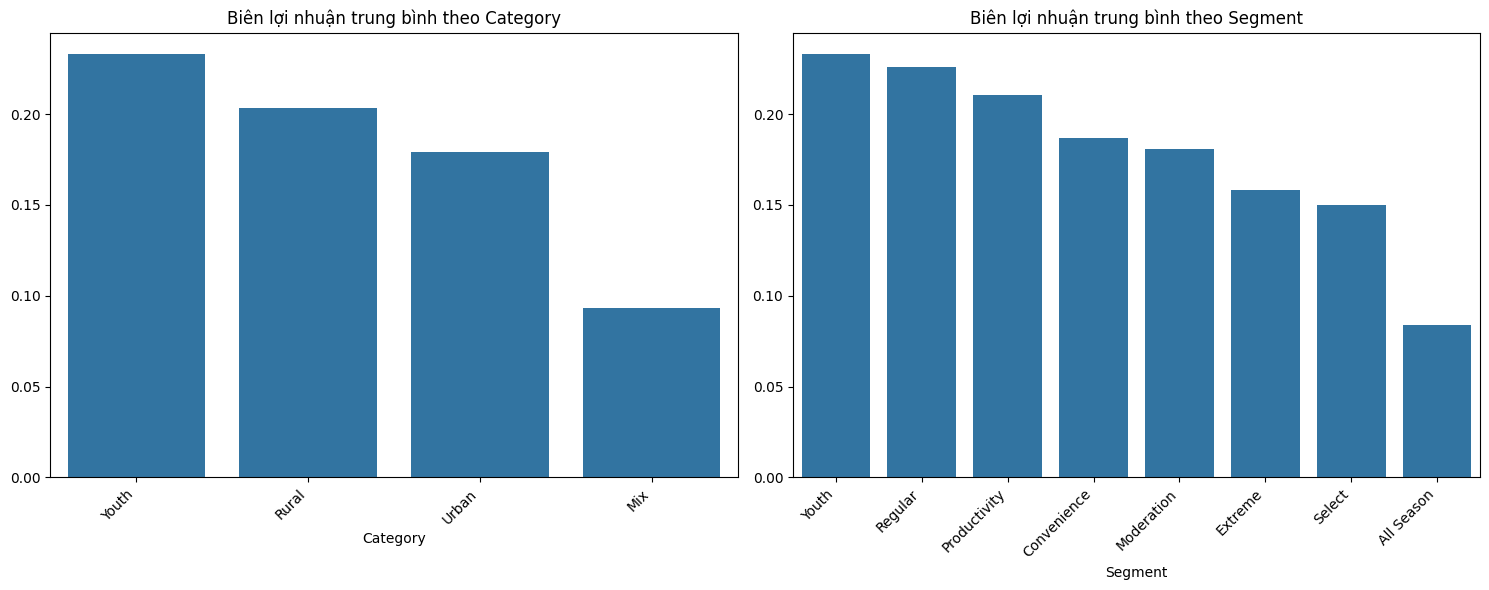

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo 2 biểu đồ con
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ Biên lợi nhuận trung bình theo Category
sns.barplot(x=category_profit.index, y=category_profit.values, ax=axes[0])
axes[0].set_title("Biên lợi nhuận trung bình theo Category")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Biểu đồ Biên lợi nhuận trung bình theo Segment
sns.barplot(x=segment_profit.index, y=segment_profit.values, ax=axes[1])
axes[1].set_title("Biên lợi nhuận trung bình theo Segment")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Hiển thị đồ thị
plt.tight_layout()
plt.show()



`Category:`
- Youth dẫn đầu về biên lợi nhuận, cho thấy nhu cầu tiêu dùng của nhóm khách hàng trẻ tuổi rất mạnh mẽ và sẵn sàng chi trả cho các sản phẩm sáng tạo, thời trang. Đây là một thị trường tiềm năng lớn.
- Rural có biên lợi nhuận cao thứ hai, cho thấy rằng sản phẩm phục vụ cho khách hàng nông thôn có thể mang lại lợi nhuận tốt, mặc dù nhu cầu có thể không mạnh mẽ như ở khu vực đô thị.
- Urban có biên lợi nhuận thấp hơn, có thể do mức độ cạnh tranh cao trong các khu vực thành thị, dẫn đến biên lợi nhuận không cao như kỳ vọng.
- Mix có biên lợi nhuận thấp nhất, điều này cho thấy sản phẩm phục vụ cả thành thị và nông thôn hoặc những khách hàng có nhu cầu đa dạng sẽ phải đối mặt với sự cạnh tranh cao và lợi nhuận không ổn định.

`Segment:`
- Youth tiếp tục đứng đầu về biên lợi nhuận, chứng tỏ rằng sản phẩm nhắm đến giới trẻ không chỉ có tiềm năng lớn mà còn có thể mang lại lợi nhuận cao.
- Regular và Productivity cũng có biên lợi nhuận cao, cho thấy nhóm khách hàng tìm kiếm sự ổn định và hiệu quả trong công việc sẵn sàng chi trả cho các sản phẩm này.
- Convenience có biên lợi nhuận khá, nhưng không cao như các phân khúc trên. Phân khúc này nhắm đến khách hàng tìm kiếm sự tiện lợi và dễ sử dụng.
- Các phân khúc như Extreme, Select và All Season có biên lợi nhuận thấp, có thể do các sản phẩm này yêu cầu chi phí sản xuất cao hoặc phải đáp ứng nhiều yêu cầu, dẫn đến lợi nhuận không cao như mong đợi

## Đề xuất đầu tư:
- Youth (Category & Segment): Mặc dù doanh thu thấp, biên lợi nhuận cao nhất, tiềm năng lớn. Đầu tư vào Youth có thể mang lại lợi nhuận lớn trong tương lai.
- Regular & Productivity: Biên lợi nhuận cao, ổn định. Đầu tư vào những phân khúc này có thể mang lại lợi nhuận bền vững.
- Urban: Doanh thu cao nhất nhưng biên lợi nhuận thấp. Cần chiến lược tối ưu hóa chi phí và marketing để cải thiện lợi nhuận.
- Rural: Biên lợi nhuận cao, ổn định. Là lựa chọn tốt nếu muốn đầu tư vào thị trường nông thôn.
- Mix & Extreme: Cần cân nhắc kỹ lưỡng do biên lợi nhuận thấp và chi phí sản xuất cao

# 5. Xu hướng doanh thu theo thời gian

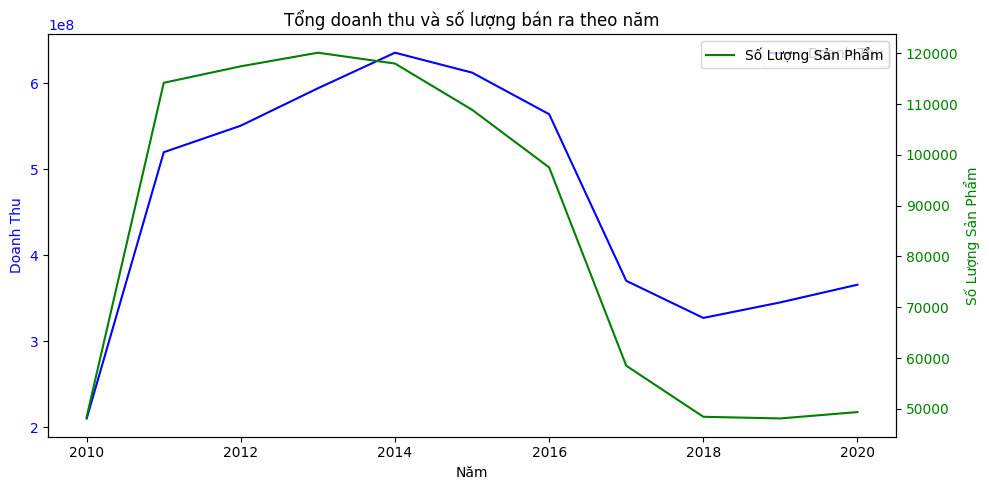

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tổng doanh thu theo năm
yearly_revenue = df.groupby("Year")["Revenue"].sum()

# Tổng số lượng sản phẩm bán ra theo năm
yearly_units = df.groupby("Year")["Units"].sum()

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 5))

# Biểu đồ Doanh thu theo năm (trục chính)
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, ax=ax1, color='b', label='Doanh Thu')
ax1.set_xlabel('Năm')
ax1.set_ylabel('Doanh Thu', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title("Tổng doanh thu và số lượng bán ra theo năm")

# Tạo trục phụ cho Số lượng bán ra
ax2 = ax1.twinx()
sns.lineplot(x=yearly_units.index, y=yearly_units.values, ax=ax2, color='g', label='Số Lượng Sản Phẩm')
ax2.set_ylabel('Số Lượng Sản Phẩm', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Hiển thị đồ thị
plt.tight_layout()
plt.show()


In [51]:
df['Profit'] = df['Revenue'] - df['COGS']
df['Profit Margin'] = df['Profit'] / df['Revenue']

df['Year'] = df['Date'].dt.year

units_by_year_category = df.groupby(['Year', 'Category'])['Units'].sum().unstack()
revenue_by_year_category = df.groupby(['Year', 'Category'])['Revenue'].sum().unstack()
profit_by_year_category = df.groupby(['Year', 'Category'])['Profit'].sum().unstack()
profit_margin_by_year_category = df.groupby(['Year', 'Category'])['Profit Margin'].mean().unstack()


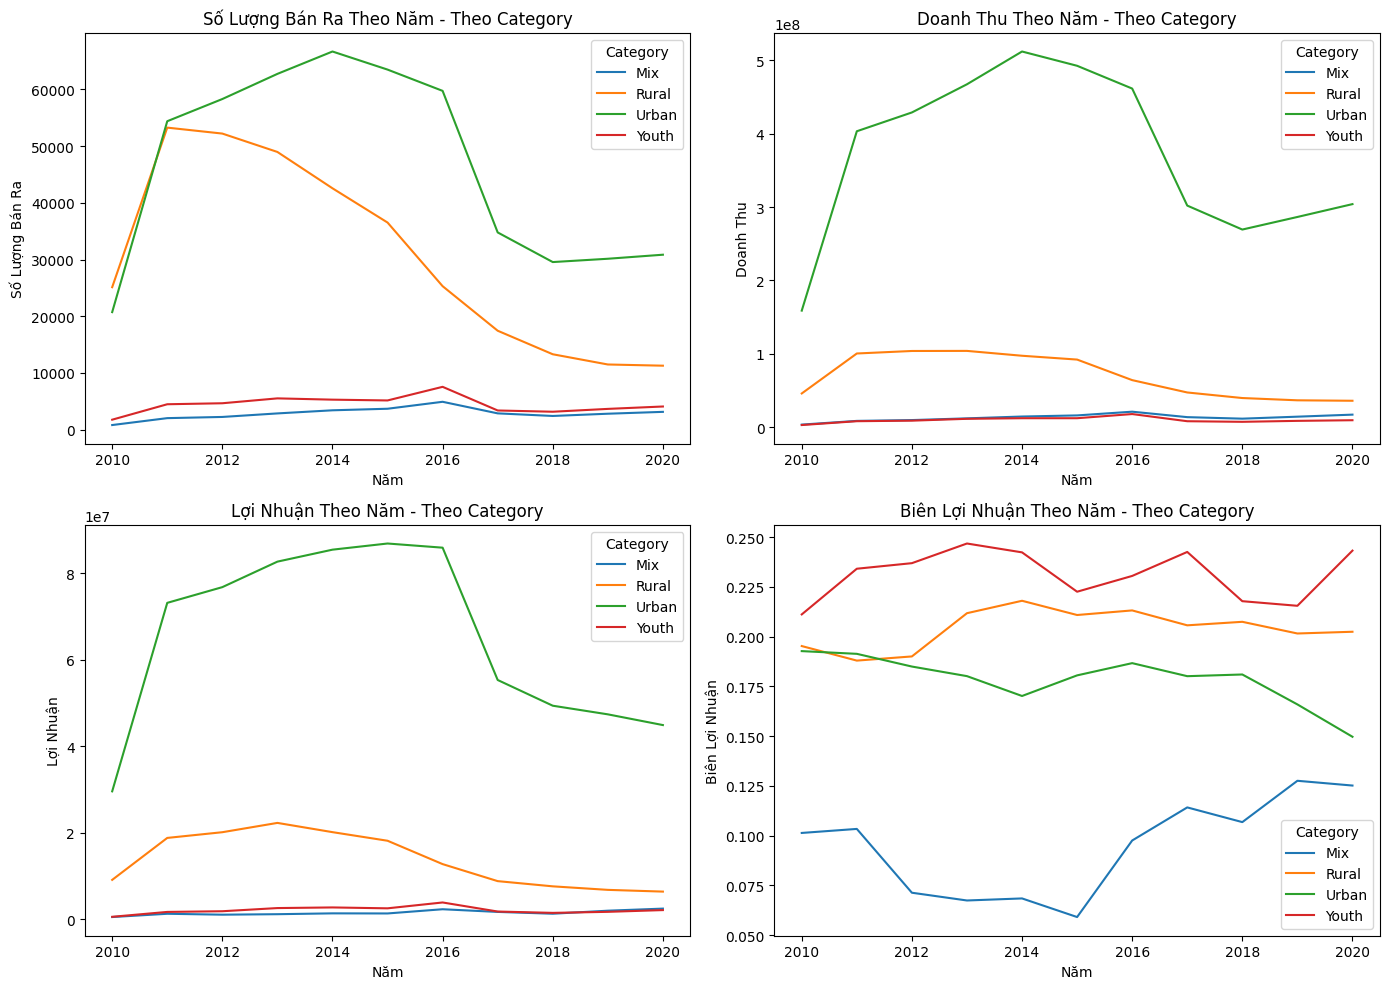

In [61]:
import matplotlib.pyplot as plt

# Tạo biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Biểu đồ Số Lượng Bán Ra Theo Năm
units_by_year_category.plot(kind='line', ax=axes[0, 0])
axes[0, 0].set_title('Số Lượng Bán Ra Theo Năm - Theo Category')
axes[0, 0].set_xlabel('Năm')
axes[0, 0].set_ylabel('Số Lượng Bán Ra')
axes[0, 0].legend(title='Category')

# Biểu đồ Doanh Thu Theo Năm
revenue_by_year_category.plot(kind='line', ax=axes[0, 1])
axes[0, 1].set_title('Doanh Thu Theo Năm - Theo Category')
axes[0, 1].set_xlabel('Năm')
axes[0, 1].set_ylabel('Doanh Thu')
axes[0, 1].legend(title='Category')

# Biểu đồ Lợi Nhuận Theo Năm
profit_by_year_category.plot(kind='line', ax=axes[1, 0])
axes[1, 0].set_title('Lợi Nhuận Theo Năm - Theo Category')
axes[1, 0].set_xlabel('Năm')
axes[1, 0].set_ylabel('Lợi Nhuận')
axes[1, 0].legend(title='Category')

# Biểu đồ Biên Lợi Nhuận Theo Năm
profit_margin_by_year_category.plot(kind='line', ax=axes[1, 1])
axes[1, 1].set_title('Biên Lợi Nhuận Theo Năm - Theo Category')
axes[1, 1].set_xlabel('Năm')
axes[1, 1].set_ylabel('Biên Lợi Nhuận')
axes[1, 1].legend(title='Category')

# Đặt tiêu đề và labels cho các biểu đồ
plt.tight_layout()
plt.show()


### Chiến lược đầu tư hợp lý theo từng nhóm Category
1. `Urban` (Khu vực thành thị)  
Nhận xét: Đây từng là phân khúc mạnh nhất nhưng đang giảm mạnh từ 2016.    
Chiến lược đầu tư:  
- Ngắn hạn: Nếu có cơ hội phục hồi, có thể đầu tư lướt sóng khi giá thấp.
- Dài hạn: Tránh đầu tư lớn vì xu hướng giảm kéo dài.
- Tái cơ cấu: Tìm cách đa dạng hóa sản phẩm hoặc dịch vụ để giữ khách hàng.  
2. `Rural` (Khu vực nông thôn)    
Nhận xét: Có sự ổn định nhưng đang suy giảm dần.  
Chiến lược đầu tư:  
- Đầu tư vào các sản phẩm thiết yếu: Tập trung vào các mặt hàng có nhu cầu dài hạn.
- Tối ưu hóa chi phí: Doanh thu giảm nhưng biên lợi nhuận vẫn tốt, nên cần cắt giảm chi phí vận hành để duy trì lợi nhuận.
- Tiếp thị & mở rộng thị trường: Có thể mở rộng thị trường bằng các sản phẩm giá rẻ hơn để phù hợp với nhu cầu nông thôn.
3. `Youth` (Phân khúc giới trẻ)  
Nhận xét: Biên lợi nhuận cao nhất và ổn định.   
Chiến lược đầu tư:  
- Tăng cường đầu tư: Đây là phân khúc có tiềm năng nhất để phát triển bền vững.  
- Đổi mới sản phẩm: Cập nhật xu hướng để phù hợp với nhu cầu giới trẻ. 
- Tận dụng Marketing số: Dùng nền tảng kỹ thuật số để tiếp cận nhóm khách hàng trẻ, tối ưu lợi nhuận.
4. `Mix` (Hỗn hợp)  
Nhận xét: Doanh thu và lợi nhuận thấp, biên lợi nhuận cũng không cao.  
Chiến lược đầu tư:  
- Chỉ đầu tư ngắn hạn: Không nên đặt kỳ vọng lớn vào phân khúc này.
- Tìm kiếm cơ hội niche (thị trường ngách): Tập trung vào phân khúc đặc biệt, thay vì đầu tư dàn trải.
- Tái cấu trúc hoặc hợp tác: Cân nhắc sáp nhập hoặc hợp tác với các danh mục khác để cải thiện hiệu suất.

| Category  | Mức ưu tiên đầu tư  | Chiến lược |
|-----------|------------------|------------|
| **Urban**  | ⭐⭐ (Trung bình)  | Chỉ đầu tư ngắn hạn, cần phục hồi tăng trưởng. |
| **Rural**  | ⭐⭐⭐ (Khá tốt)    | Tập trung vào tối ưu chi phí và mở rộng thị trường. |
| **Youth**  | ⭐⭐⭐⭐ (Tốt nhất)  | Tăng cường đầu tư, đổi mới sản phẩm, tận dụng marketing số. |
| **Mix**    | ⭐ (Thấp)         | Chỉ đầu tư ngắn hạn hoặc tìm thị trường ngách. |


In [58]:
units_by_year_segment = df.groupby(['Year', 'Segment'])['Units'].sum().unstack()
revenue_by_year_segment = df.groupby(['Year', 'Segment'])['Revenue'].sum().unstack()
profit_by_year_segment = df.groupby(['Year', 'Segment'])['Profit'].sum().unstack()
profit_margin_by_year_segment = df.groupby(['Year', 'Segment'])['Profit Margin'].mean().unstack()


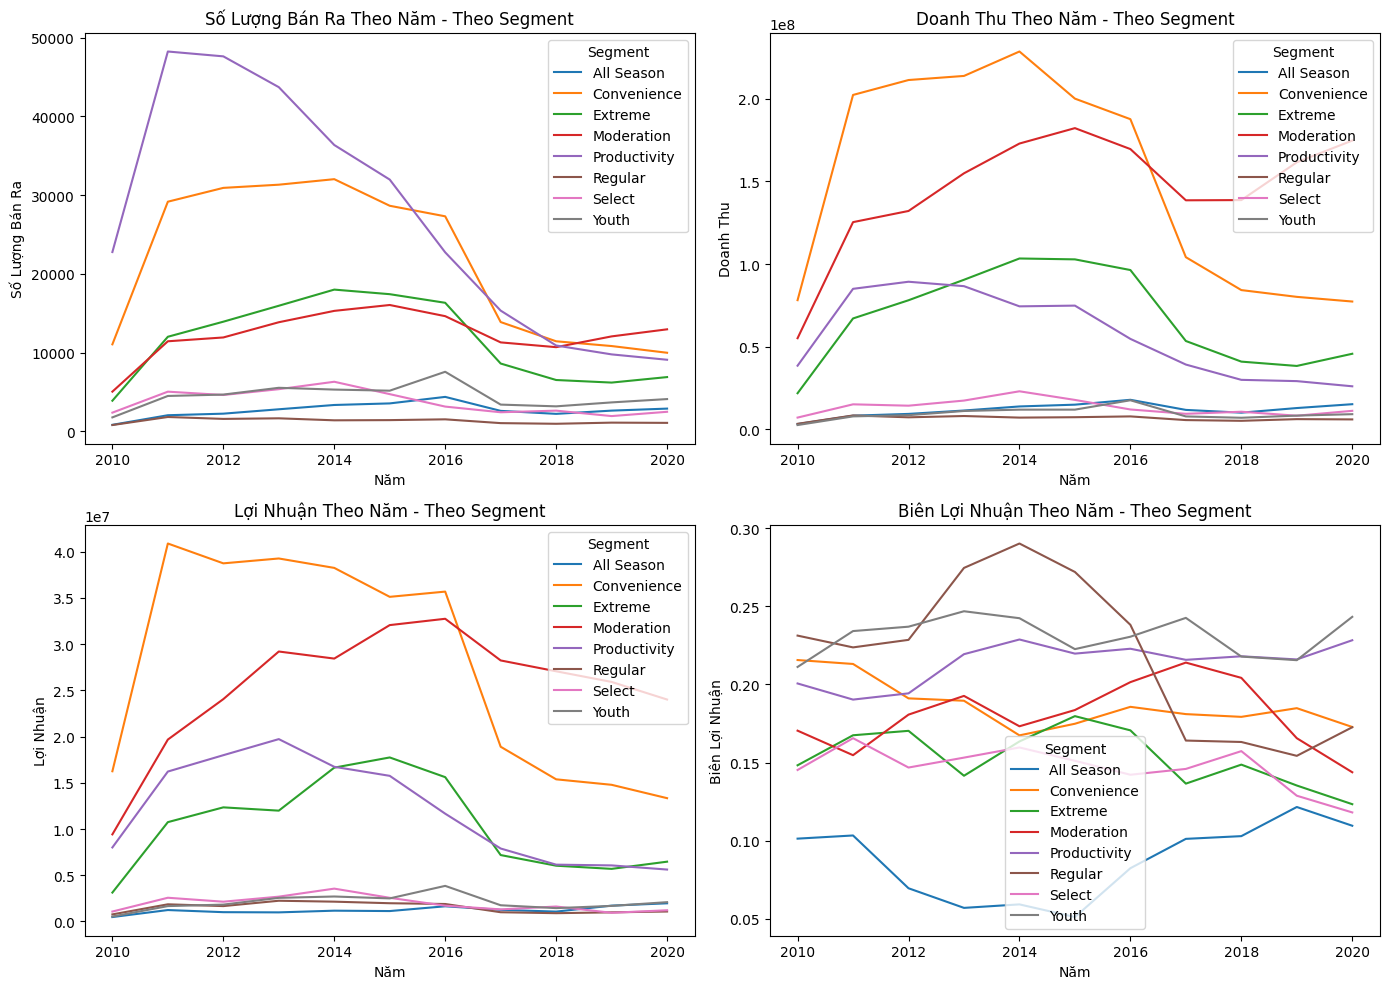

In [62]:
import matplotlib.pyplot as plt

# Tạo biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Biểu đồ Số Lượng Bán Ra Theo Năm (Segment)
units_by_year_segment.plot(kind='line', ax=axes[0, 0])
axes[0, 0].set_title('Số Lượng Bán Ra Theo Năm - Theo Segment')
axes[0, 0].set_xlabel('Năm')
axes[0, 0].set_ylabel('Số Lượng Bán Ra')
axes[0, 0].legend(title='Segment')

# Biểu đồ Doanh Thu Theo Năm (Segment)
revenue_by_year_segment.plot(kind='line', ax=axes[0, 1])
axes[0, 1].set_title('Doanh Thu Theo Năm - Theo Segment')
axes[0, 1].set_xlabel('Năm')
axes[0, 1].set_ylabel('Doanh Thu')
axes[0, 1].legend(title='Segment')

# Biểu đồ Lợi Nhuận Theo Năm (Segment)
profit_by_year_segment.plot(kind='line', ax=axes[1, 0])
axes[1, 0].set_title('Lợi Nhuận Theo Năm - Theo Segment')
axes[1, 0].set_xlabel('Năm')
axes[1, 0].set_ylabel('Lợi Nhuận')
axes[1, 0].legend(title='Segment')

# Biểu đồ Biên Lợi Nhuận Theo Năm (Segment)
profit_margin_by_year_segment.plot(kind='line', ax=axes[1, 1])
axes[1, 1].set_title('Biên Lợi Nhuận Theo Năm - Theo Segment')
axes[1, 1].set_xlabel('Năm')
axes[1, 1].set_ylabel('Biên Lợi Nhuận')
axes[1, 1].legend(title='Segment')

# Đặt tiêu đề và labels cho các biểu đồ
plt.tight_layout()
plt.show()


### **Nhận xét chung về tình hình và chiến lược đầu tư**  

#### **1. Tình hình thị trường có dấu hiệu suy giảm sau 2016**  
- Tổng thể, nhiều phân khúc có xu hướng giảm về **số lượng bán ra, doanh thu và lợi nhuận**, đặc biệt là các phân khúc từng có doanh thu cao như **Convenience và Productivity**.  
- Điều này có thể do **thay đổi xu hướng tiêu dùng, cạnh tranh gia tăng hoặc chi phí vận hành tăng lên**.  

#### **2. Một số phân khúc vẫn giữ vững lợi nhuận**  
- **Extreme, Moderation và Select** có mức **ổn định tốt hơn**, không bị suy giảm mạnh. Điều này cho thấy các phân khúc này có **độ bền vững cao hơn**, thích hợp để đầu tư lâu dài.  
- **Youth** tuy có doanh thu thấp nhưng có **biên lợi nhuận cao**, cho thấy tiềm năng phát triển nếu có chiến lược marketing tốt.  

#### **3. Cần tập trung tối ưu hóa chi phí cho Convenience và Productivity**  
- Hai phân khúc này có doanh thu lớn nhưng lại có dấu hiệu giảm lợi nhuận, cho thấy **chi phí hoạt động có thể đang gia tăng**.  
- Cần có chiến lược **tinh gọn sản phẩm, giảm chi phí vận hành và tìm kiếm mô hình kinh doanh hiệu quả hơn**.  

#### **4. Một số phân khúc không nên đầu tư mạnh**  
- **All Season và Regular** có biên lợi nhuận thấp, doanh thu không cao và có xu hướng giảm. Do đó, **cần hạn chế đầu tư vào hai phân khúc này** hoặc chỉ duy trì mức đầu tư tối thiểu.  

---  

### **Đề xuất chiến lược chung**  
✔ **Tăng cường đầu tư vào Extreme, Moderation và Select** do biên lợi nhuận tốt và ổn định.  
✔ **Giữ Convenience và Productivity, nhưng tập trung vào tối ưu hóa chi phí** để tránh suy giảm lợi nhuận.  
✔ **Mở rộng phân khúc Youth với chiến lược marketing mạnh hơn** để tận dụng biên lợi nhuận cao.  
✔ **Cắt giảm hoặc không mở rộng All Season và Regular**, tránh đầu tư vào những phân khúc có lợi nhuận thấp.  

---  

### **Chiến lược đầu tư theo phân khúc**

| Segment       | Mức ưu tiên đầu tư  | Chiến lược |
|--------------|------------------|------------|
| **Convenience**  | ⭐⭐⭐ (Khá tốt)   | Tiếp tục đầu tư nhưng cần tối ưu chi phí để duy trì lợi nhuận. Nên đẩy mạnh marketing và cải thiện chất lượng sản phẩm. |
| **Productivity** | ⭐⭐⭐ (Khá tốt)   | Giữ mức đầu tư trung bình, tập trung cải thiện biên lợi nhuận bằng cách cắt giảm chi phí vận hành. |
| **Extreme**      | ⭐⭐⭐⭐ (Tốt nhất)  | Đầu tư mạnh do doanh thu và lợi nhuận duy trì ổn định, ít bị ảnh hưởng bởi xu hướng giảm chung. |
| **Moderation**   | ⭐⭐⭐⭐ (Tốt nhất)  | Đầu tư dài hạn vì có biên lợi nhuận tốt và ổn định. |
| **Select**       | ⭐⭐⭐⭐ (Tốt nhất)  | Phân khúc có biên lợi nhuận cao, phù hợp để đầu tư vào sản phẩm cao cấp hoặc chiến lược giá trị gia tăng. |
| **Youth**        | ⭐⭐⭐ (Khá tốt)   | Tập trung vào đổi mới sản phẩm và marketing số để tận dụng lợi thế biên lợi nhuận cao. |
| **Regular**      | ⭐⭐ (Trung bình)  | Chỉ nên đầu tư cầm chừng, do doanh thu và lợi nhuận không cao. |
| **All Season**   | ⭐ (Thấp)         | Tránh đầu tư mạnh do lợi nhuận thấp và biên lợi nhuận không tốt. |



# 6. Phát hiện ngoại lệ, rủi ro

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


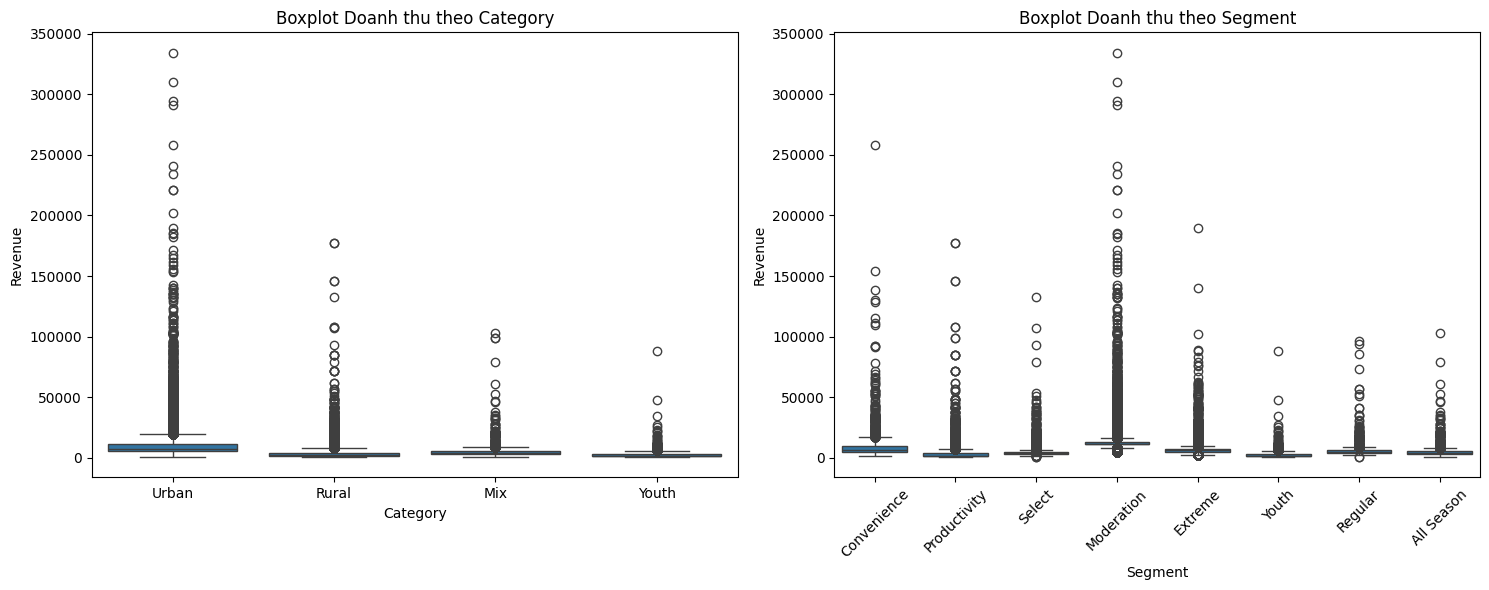

In [72]:
plt.figure(figsize=(15, 6))

# Vẽ boxplot cho doanh thu theo Category
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="Category", y="Revenue")
plt.title("Boxplot Doanh thu theo Category")

# Vẽ boxplot cho doanh thu theo Segment
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Segment", y="Revenue")
plt.title("Boxplot Doanh thu theo Segment")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [73]:
# Tính toán Z-score
df["Z_Revenue"] = zscore(df["Revenue"])
df["Z_Profit"] = zscore(df["Profit"])

# Lọc các điểm ngoại lệ (|Z-score| > 3)
outliers_revenue = df[np.abs(df["Z_Revenue"]) > 3]
outliers_profit = df[np.abs(df["Z_Profit"]) > 3]

print("Ngoại lệ trong doanh thu:")
print(outliers_revenue)

print("\nNgoại lệ trong lợi nhuận:")
print(outliers_profit)


Ngoại lệ trong doanh thu:
        ProductID       Date    Zip  Units    Revenue          COGS  \
0            1228 2013-07-31  78773     12   19648.44  12309.747660   
1             781 2014-03-12  90501     16   20351.52  13497.128064   
2            2090 2013-11-29  44460     26  111367.62  91488.499830   
3            1116 2018-08-29  30122     12   36280.44  21967.806420   
4             993 2013-04-27  75789     14   55557.18  48645.866808   
...           ...        ...    ...    ...        ...           ...   
349063        412 2017-06-01  73460      1   19529.37  17012.034207   
349064        412 2017-06-27  95832      1   19529.37  17012.034207   
349065        412 2017-07-08  53546      1   19529.37  17012.034207   
349066        412 2016-11-09  45750      1   19529.37  17012.034207   
349067        412 2017-03-08  46311      1   19529.37  17012.034207   

                      City State   Region      District Category  \
0               Austin, TX    TX  Central  District #

Phương sai doanh thu theo Category:
Category
Mix      6.611192e+06
Rural    3.640219e+06
Urban    1.922574e+07
Youth    2.020299e+06
Name: Revenue, dtype: float64

Phương sai doanh thu theo Segment:
Segment
All Season      6.292611e+06
Convenience     1.038540e+07
Extreme         6.271512e+06
Moderation      2.464598e+07
Productivity    3.382516e+06
Regular         6.594861e+06
Select          4.160921e+06
Youth           2.020299e+06
Name: Revenue, dtype: float64


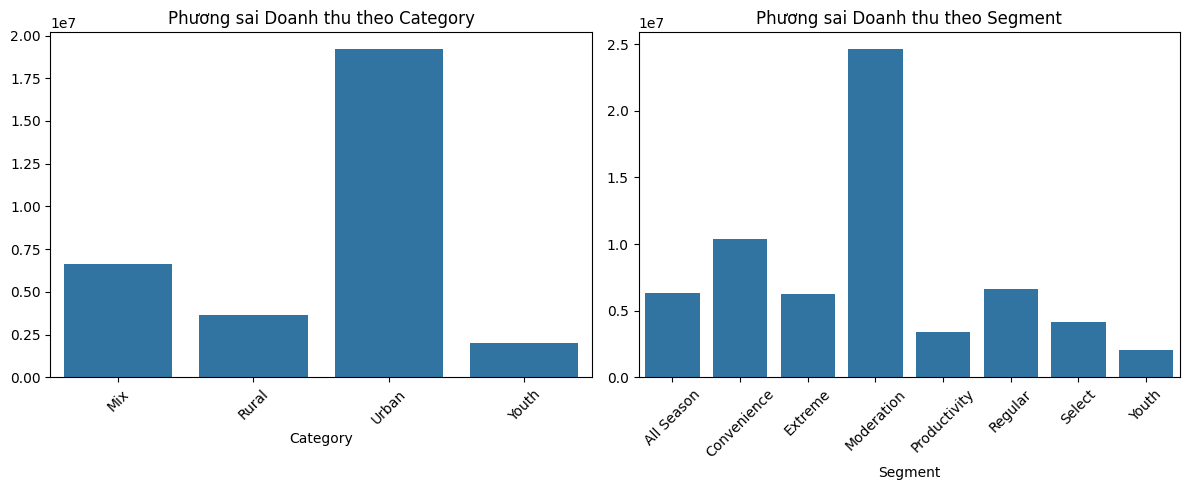

In [74]:
# Tính phương sai theo Category và Segment
variance_category = df.groupby("Category")["Revenue"].var()
variance_segment = df.groupby("Segment")["Revenue"].var()

print("Phương sai doanh thu theo Category:")
print(variance_category)

print("\nPhương sai doanh thu theo Segment:")
print(variance_segment)

# Vẽ biểu đồ phương sai
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=variance_category.index, y=variance_category.values)
plt.title("Phương sai Doanh thu theo Category")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=variance_segment.index, y=variance_segment.values)
plt.title("Phương sai Doanh thu theo Segment")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


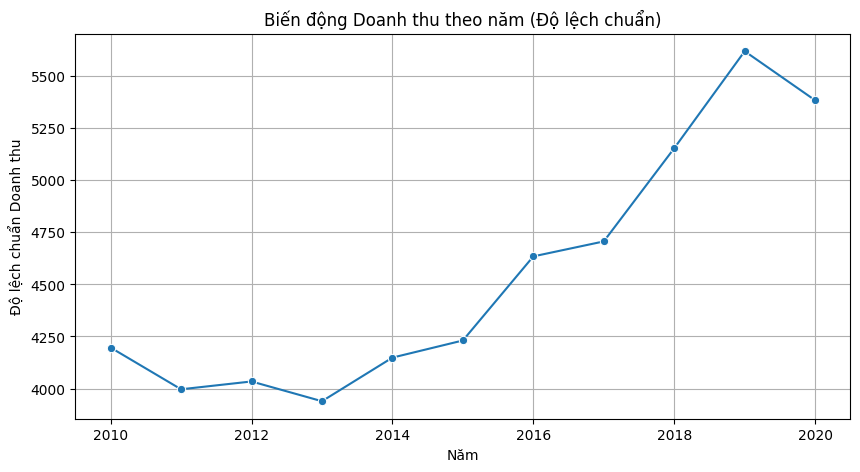

In [75]:
df["Year"] = pd.to_datetime(df["Date"]).dt.year  # Nếu có cột Date

# Tính độ lệch chuẩn của doanh thu theo năm
std_yearly = df.groupby("Year")["Revenue"].std()

plt.figure(figsize=(10, 5))
sns.lineplot(x=std_yearly.index, y=std_yearly.values, marker="o")
plt.title("Biến động Doanh thu theo năm (Độ lệch chuẩn)")
plt.xlabel("Năm")
plt.ylabel("Độ lệch chuẩn Doanh thu")
plt.grid()
plt.show()


In [77]:
# Tính lợi nhuận trung bình và độ lệch chuẩn
mean_profit = df["Profit"].mean()
std_profit = df["Profit"].std()

# Tính Sharpe Ratio (Lợi nhuận trung bình / Độ lệch chuẩn)
sharpe_ratio = mean_profit / std_profit

print("Sharpe Ratio:", sharpe_ratio)


Sharpe Ratio: 0.7041620142731991


### **Nhận xét về rủi ro và cơ hội đầu tư dựa trên phân tích dữ liệu**

#### **1. Phát hiện ngoại lệ từ Boxplot**
- Các **ngoại lệ lớn trong doanh thu** xuất hiện ở cả **Category (Urban, Rural, Mix, Youth)** và **Segment (Moderation, Convenience, Extreme, Select, v.v.)**.
- **Urban** có nhiều giá trị doanh thu cao bất thường, điều này cho thấy khu vực thành thị có những đơn hàng đặc biệt lớn, có thể đến từ các khách hàng lớn hoặc mùa cao điểm.
- **Moderation** có nhiều điểm doanh thu cao, nhưng phương sai cũng rất lớn, cho thấy có nhiều **rủi ro biến động**.

🔹 **Lưu ý đầu tư:**  
- Cần xác định nguyên nhân của các ngoại lệ: Doanh thu đột biến đến từ sự kiện đặc biệt hay một khách hàng lớn? Nếu do sự kiện, lợi nhuận có thể không bền vững.  
- Với các phân khúc có ngoại lệ lớn (**Moderation, Urban**), nên theo dõi chặt chẽ chiến lược giá và tồn kho để giảm rủi ro.

---

#### **2. Phân tích rủi ro qua phương sai doanh thu**
- **Urban có phương sai doanh thu cao nhất**, cho thấy **rủi ro cao nhưng có tiềm năng lớn**.
- **Moderation có phương sai cao nhất trong các Segment**, điều này đồng nghĩa với **biến động doanh thu rất lớn**, có thể do thị trường thay đổi mạnh hoặc chiến lược bán hàng chưa ổn định.
- **Youth và Select có phương sai thấp**, cho thấy doanh thu ổn định hơn, ít biến động.

🔹 **Lưu ý đầu tư:**  
- **Urban và Moderation** có cơ hội sinh lợi lớn nhưng đi kèm rủi ro cao. Nếu đầu tư vào đây, cần có chiến lược phòng ngừa rủi ro.  
- **Youth và Select** phù hợp với các nhà đầu tư tìm kiếm **tăng trưởng ổn định và ít rủi ro hơn**.

---

#### **3. Xu hướng biến động doanh thu theo thời gian**
- Độ lệch chuẩn doanh thu tăng dần từ năm 2014 và đạt đỉnh vào năm 2019, cho thấy **mức độ biến động doanh thu ngày càng lớn**.
- Từ 2017 trở đi, độ lệch chuẩn tăng rất mạnh, có thể liên quan đến **sự thay đổi trong chiến lược kinh doanh, thị trường, hoặc các yếu tố kinh tế vĩ mô**.

🔹 **Lưu ý đầu tư:**  
- Trong các năm gần đây, doanh thu có nhiều biến động, cần **xây dựng kế hoạch quản lý rủi ro tài chính**.  
- Nếu doanh thu tiếp tục biến động, **các chiến lược đầu tư dài hạn vào các phân khúc có biên lợi nhuận cao sẽ là lựa chọn an toàn hơn**.

---

#### **4. Đánh giá Sharpe Ratio (0.70)**
- Sharpe Ratio = **0.704**, cho thấy mức **lợi nhuận trên mỗi đơn vị rủi ro ở mức trung bình**.
- Một Sharpe Ratio **dưới 1** có nghĩa là rủi ro khá cao so với lợi nhuận.
- Nếu tăng Sharpe Ratio > 1, cần tập trung vào **các phân khúc có lợi nhuận cao và ít biến động hơn**.

🔹 **Lưu ý đầu tư:**  
- Để tối ưu hóa rủi ro, nên **cắt giảm đầu tư vào các phân khúc có phương sai quá lớn**, thay vào đó tập trung vào **Youth, Select, Productivity** để cân bằng rủi ro.  
- Nếu chấp nhận rủi ro cao hơn để đạt lợi nhuận cao, có thể **xem xét đầu tư mạnh vào Urban, Moderation nhưng phải có kế hoạch bảo vệ vốn**.

---

### **📌 Kết luận & Chiến lược đầu tư đề xuất**

1️⃣ **Nhóm rủi ro cao nhưng tiềm năng lớn (Urban, Moderation)**  
   - Cần có chiến lược giảm rủi ro như kiểm soát chi phí, tối ưu hóa chuỗi cung ứng.  
   - Đầu tư **trong ngắn hạn**, tập trung vào các giai đoạn tăng trưởng mạnh.  

2️⃣ **Nhóm ổn định, ít biến động hơn (Youth, Select, Productivity)**  
   - Đầu tư **dài hạn**, an toàn hơn, phù hợp với mục tiêu ổn định dòng tiền.  
   - Có thể kết hợp các chiến lược **mở rộng thị trường, cải tiến sản phẩm**.  

3️⃣ **Cần theo dõi xu hướng thị trường & điều chỉnh chiến lược linh hoạt**  
   - Nếu doanh thu tiếp tục biến động mạnh trong tương lai, nên **giảm đầu tư vào các phân khúc có phương sai quá lớn**.  
   - Nếu tình hình kinh tế vĩ mô thay đổi, cần **xây dựng quỹ dự phòng để đối phó với rủi ro**.  

🎯 **Tóm lại, chiến lược đầu tư hợp lý sẽ là kết hợp giữa:**  
✅ **Ngắn hạn:** Tận dụng tiềm năng lợi nhuận cao của **Urban, Moderation** nhưng quản lý rủi ro tốt.  
✅ **Dài hạn:** Đầu tư vào các phân khúc ổn định như **Youth, Select, Productivity** để duy trì tăng trưởng bền vững.  

🚀 **Lời khuyên:** Nếu muốn tối ưu hóa lợi nhuận, hãy cân nhắc **tái cấu trúc danh mục đầu tư** để cân bằng giữa rủi ro và cơ hội!
